# Computational Physics: 281
\- Manav Kulshreshta

## Homework 2. 2/13/19.

### 1. Newman Exercise 3.1: Plotting experimental data
#### a)

For this problem, I defined a function that plots a graph given appropriate arguments. I loaded the text file into an array. I then sliced said array to get the x and y values and plotted the graph with the appropriate labels.

Note: I've defined a version of the function that doesn't show the plot, takes a couple keyword-argument, and unpacks an array into arguments to use in the 4th question.

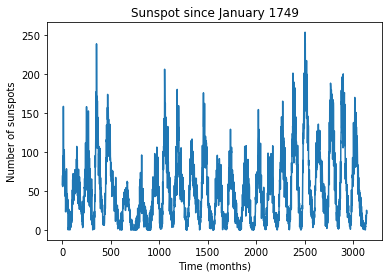

In [3]:
import numpy as np
import matplotlib.pyplot as plt

path = '../cpresources/sunspots.txt'
data = np.loadtxt(path)

def plot_noshow(x, y, title, x_label, y_label, subplot=None, figsize=None, hspace=None, wspace=None):
    if subplot is not None:
        plt.subplot(*subplot)
    if figsize is not None:
        plt.figure(figsize=figsize)
    if wspace is not None:
        plt.subplots_adjust(wspace=wspace)
    if hspace is not None:
        plt.subplots_adjust(hspace=hspace)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y)

def plot(x, y, title, x_label, y_label, subplot=None, figsize=None, hspace=None, wspace=None):
    plot_noshow(x, y, title, x_label, y_label, subplot=subplot, figsize=figsize, hspace=hspace, wspace=wspace)
    plt.show()
    
x_sunspot = data[:,0]
y_sunspot = data[:,1]
    
plot(x_sunspot, y_sunspot, 'Sunspot since January 1749', 'Time (months)', 'Number of sunspots')

#### b)
For this part of the problem, I simply used the previously defined function and sliced the array in a way that only the first 1000 set of values would be plotted.

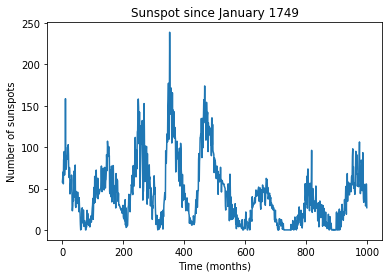

In [4]:
plot(data[:1000,0], data[:1000,1], 'Sunspot since January 1749', 'Time (months)', 'Number of sunspots')

### 2. Newman Exercise 3.2: Curve plotting
#### a)
For this problem, I used the linspace function to initialize theta to uniformly distributed values where $0 \leq \theta \leq 2\pi$ and defined $x = 2\cos(\theta) + \cos(2\theta)$ and $y = 2\sin(\theta) - \sin(2\theta)$. I then plotted them using the function defined above.

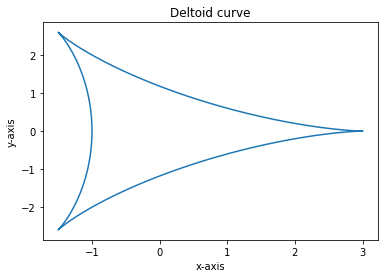

In [5]:
theta = np.linspace(0, 2*np.pi, 1000)

x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)

plot(x, y, 'Deltoid curve', 'x-axis', 'y-axis')

#### b)
This problem is set up in a similar fashion, but plots a polar function by converting to cartesian coordinates.
$$0 \leq \theta \leq 10\pi$$
$$r = \theta^2$$
$$x = r\cos(\theta)$$
$$y = r\sin(\theta)$$

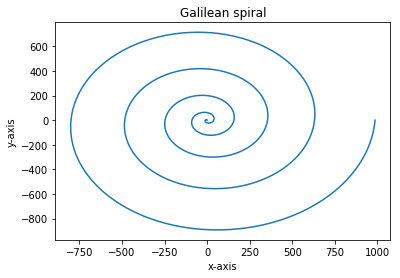

In [6]:
theta = np.linspace(0, 10*np.pi, 1000)
r = theta**2

x = r*np.cos(theta)
y = r*np.sin(theta)

plot(x, y, 'Galilean spiral', 'x-axis', 'y-axis')

#### c)
Same setup as the previous question, but
$$0 \leq \theta \leq 24\pi$$
$$re^{\cos(\theta)}-2\cos(4\theta)+\sin^5(\frac{\theta}{12})$$
$$x = r\cos(\theta)$$
$$y = r\sin(\theta)$$

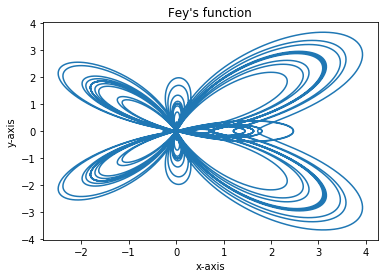

In [7]:
theta = np.linspace(0, 24*np.pi, 10000)
r = np.exp(np.cos(theta)) - 2*np.cos(4*theta) + np.sin(theta/12)**5

x = r*np.cos(theta)
y = r*np.sin(theta)

plot(x, y, 'Fey\'s function', 'x-axis', 'y-axis')

### 3. Newman Exercise 3.3: Plot some STM data.

Same setup as the first question, but I used the imshow function to plot the density plot.

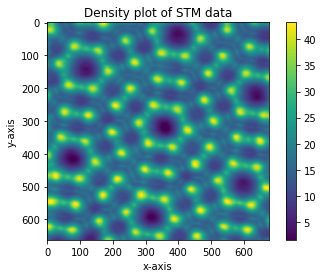

In [8]:
path = '../cpresources/stm.txt'
data = np.loadtxt(path)

def density_plot(data, title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.imshow(data)
    plt.colorbar()
    
density_plot(data, 'Density plot of STM data', 'x-axis', 'y-axis')

### 4. Quantum harmonic oscilator
Here, I use a for-loop to iterate over a list of n values. Much like the previous problems, x is defined over an interval and then used to get a function p.
$$x_{max} = 2\sqrt{n+1}$$
$$-x_{max} \leq x \leq x_{max}$$
$$p(x) = e^{-x^2}(H_{n}(x))^2$$
Where $H_{n}(x)$ is a Hermite polynomial.

Note: I had to use subplots_adjust with wspace and hspace parameters so that the labels didn't overlap.

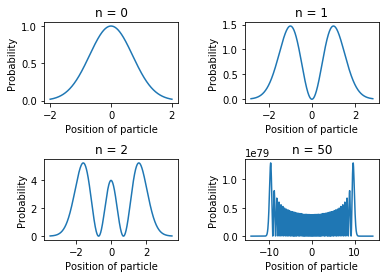

In [9]:
import scipy.special

subplot_index = 1
for n in [0,1,2,50]:
    x_max = 2*(n+1)**.5
    x = np.linspace(-x_max, x_max, 1000)
    p = np.exp(-(x**2))*(scipy.special.eval_hermite(n,x)**2)
    plot_noshow(x, p, f'n = {n}', 'Position of particle', 'Probability', subplot=[2,2,subplot_index], wspace=.5, hspace=.7)
    subplot_index += 1

### 5. \*Newman Exercise 3.1
#### c)
I've used list comprehension and array slicing to get the running average in one line and plotted it, as well as the data, against the time.

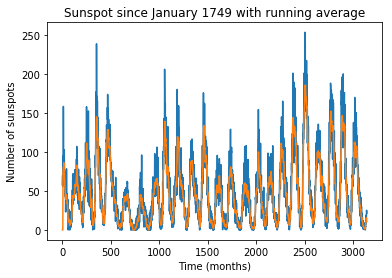

In [10]:
r = 5

y_k = np.array([sum(y_sunspot[i-r:i+r])/(2*r+1) for i in range(len(y_sunspot))])

plot_noshow(x_sunspot, y_sunspot, 'Sunspot since January 1749', 'Time (months)', 'Number of sunspots')
plot_noshow(x_sunspot, y_k, 'Sunspot since January 1749 with running average', 'Time (months)', 'Number of sunspots')